 ## 1.Business Understanding 
 ---
 ###  Context
In 2009, the U.S. conducted the National H1N1 Flu Survey to understand vaccination behaviors during the H1N1 pandemic. This effort mirrors the challenges faced in the COVID-19 era. Understanding the factors that influence vaccine uptake can help public health officials design better vaccine access strategies, communication campaigns, and policy decisions.

###  Project Goal
**Predict whether a person received the H1N1 flu vaccine** based on their background, health behavior, beliefs, and socio-demographics.

This project aims to:
- Help public health departments **identify hesitant populations**
- Guide **targeted awareness campaigns**
- Support **data-driven resource allocation** (e.g., mobile clinics, outreach)
- Inform the design of **future vaccination strategies**

---
### 🔹 Key Stakeholders
- **Public health officials** managing vaccination programs
- **Healthcare providers** engaging with patients and communities
- **Policy makers** determining communication and funding priorities
- **Data scientists** supporting health systems and NGOs

---

### 🔹 Business Questions
1. Who is most likely to get vaccinated?
2. What demographic or behavioral features are associated with vaccine acceptance or hesitancy?
3. Can we predict unvaccinated individuals **before** a campaign begins?
4. How can public health campaigns be improved based on these insights?

## 2.Data Understanding

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1. Loading the datasets provided

In [6]:
# Training set features
df_train_features = pd.read_csv('data/training_set_features.csv')
df_train_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
# Getting a general feel of what the df_train_features looks like 

print(f"The shape of df_train_features is :\n", df_train_features.shape)
print()
print(f"Some of the important features of the dataset", df_train_features.info())
print()
# print(f"Snapshot of what the numeric data looks like \n", feature_labels_df.describe())
# Check for missing values
print("Missing Values in Features:")
print(df_train_features.isnull().sum().sort_values(ascending=False).head(10))

The shape of df_train_features is :
 (26707, 36)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition   

In [8]:
# looking into the labels dataset
df_train_labels =  pd.read_csv('data/training_set_labels.csv')
df_train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [9]:
# Getting a general of what the df_train_features looks like 

print(f"The shape of df_train_labels is :\n", df_train_labels.shape)
print()
print(f"Some of the important features of the dataset", df_train_labels.info())
print()
# print(f"Snapshot of what the numeric data looks like \n", df_train_labels.describe())
# Check for missing values
print("Missing Values in Features:")
print(df_train_labels.isnull().sum().sort_values(ascending=False).head(10))

The shape of df_train_labels is :
 (26707, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB
Some of the important features of the dataset None

Missing Values in Features:
respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64


In [10]:
# Test set features
# This particular dataset will act as the useen data our models 
df_test_features = pd.read_csv('data/test_set_features.csv')
df_test_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [11]:
# Getting a general of what the df_test_features looks like 

print(f"The shape of df_train_labels is :\n", df_test_features.shape)
print()
print(f"Some of the important features of the dataset", df_test_features.info())
print()
# print(f"Snapshot of what the numeric data looks like \n", df_test_features.describe())
# Check for missing values
print("Missing Values in Features:")
print(df_test_features.isnull().sum().sort_values(ascending=False).head(10))

The shape of df_train_labels is :
 (26708, 36)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition     

### Step 2: Data Cleaning and Preprocessing

Before proceeding to analysis, the raw data was thoroughly reviewed and cleaned to ensure consistency, reliability, and readiness for modeling.

### Objectives
- Prepare the dataset for bivariate and multivariate analysis.
- Standardize formats and handle missing or inconsistent entries.
- Implement reusable, object-oriented code for cleaning workflows.

### Cleaning Workflow

The following steps were taken:

1. **Initial Exploration**
   - Loaded and previewed the dataset structure.
   - Checked shape, column names, and data types.

2. **Handling Missing Values and Inconsistencies**
   - Identified and quantified missing values across columns.
   - Filled missing values:
     - Numeric columns → median
     - Categorical columns → mode
     - Text/object columns → `"Unknown"`

3. **Type Conversion**
   - Converted appropriate `float` and `object` columns with limited unique values to `category` dtype to optimize memory and modeling.

4. **Code Reusability**
   - Implemented a custom class `VaccineDataCleaner` using Object-Oriented Programming (OOP) principles to:
     - Merge features and labels
     - Clean and prepare the dataset
     - Return a clean, analysis-ready DataFrame

---

The cleaned dataset (`df_clean`) is now ready for:
- Exploratory Data Analysis (EDA)
- Bivariate and multivariate visualizations
- Feature selection and model training


In [13]:
from data_cleaning import VaccineDataCleaner

In [14]:
# implementing VaccineDataCleaner on the dataset

cleaner = VaccineDataCleaner(df_train_features, df_train_labels)
cleaner.fill_missing()
cleaner.convert_types()

# returning the final cleaned dataframe
df_clean = cleaner.get_cleaned_data()
df_clean.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,Unknown,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [15]:
# Getting a general of what the df_clean looks like 

print(f"The shape of df_train_labels is :\n", df_clean.shape)
print()
print(f"Some of the important features of the dataset", df_clean.info())
print()
# print(f"Snapshot of what the numeric data looks like \n", df_clean.describe())
# Check for missing values
print("Missing Values in Features:")
print(df_clean.isnull().sum().sort_values(ascending=False).head(10))

The shape of df_train_labels is :
 (26707, 38)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   respondent_id                26707 non-null  int64   
 1   h1n1_concern                 26707 non-null  category
 2   h1n1_knowledge               26707 non-null  category
 3   behavioral_antiviral_meds    26707 non-null  category
 4   behavioral_avoidance         26707 non-null  category
 5   behavioral_face_mask         26707 non-null  category
 6   behavioral_wash_hands        26707 non-null  category
 7   behavioral_large_gatherings  26707 non-null  category
 8   behavioral_outside_home      26707 non-null  category
 9   behavioral_touch_face        26707 non-null  category
 10  doctor_recc_h1n1             26707 non-null  category
 11  doctor_recc_seasonal         26707 non-null  category
 12  chronic_med_

## Step 3: Exploratory Data Analysis (EDA)

This section begins the EDA process using a custom `VaccineEDA` class to explore variable distributions, relationships, and patterns relevant to vaccine uptake.


In [17]:
from EDA import VaccineEDA

We ca start by looking at the distribution of the two target variales, from the **df_train_labels**

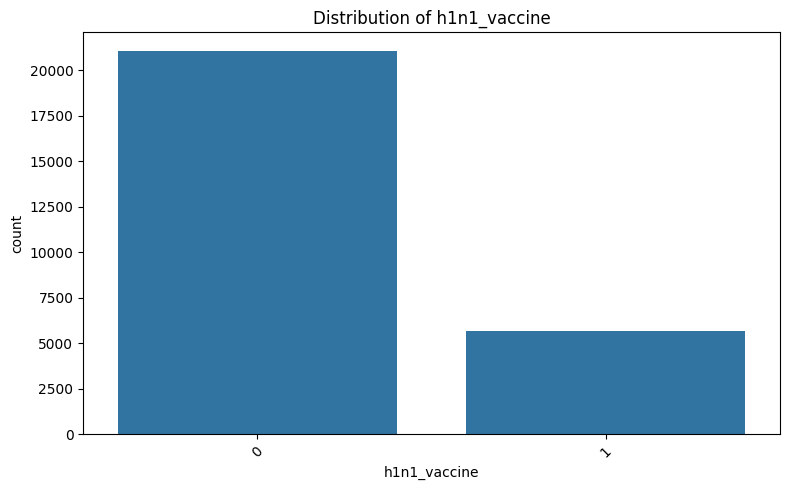

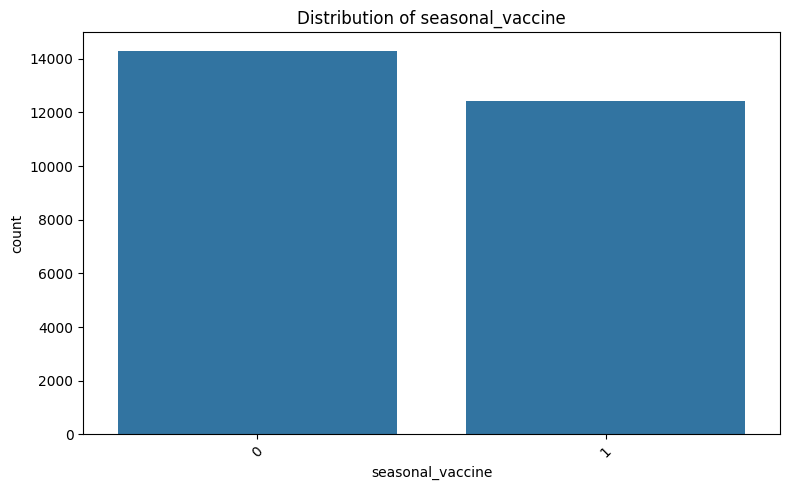

(None, None)

In [19]:
eda = VaccineEDA(df_clean)

eda.plot_bar('h1n1_vaccine'), eda.plot_bar('seasonal_vaccine')

From the two plots above we can see that almost half of the sampled population recieved the seasoal flu vaccine but less than 30% received the H1N1 vaccine. The seasonal vaccine has class balance while the H1N1 is quite imbalanced. 
- _Next we can assess whether the two target variables are independent_

In [21]:
pd.crosstab(
    df_clean["h1n1_vaccine"], df_clean["seasonal_vaccine"], margins=True, normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


#### Ordinal Encoding and Correlation Analysis

To prepare the data for correlation analysis and modeling:
- **Applied Ordinal Encoding**  
   All remaining categorical columns were converted to numeric format using `OrdinalEncoder`, which assigns integer values to each category. This is important because correlation requires numeric input.
- **Dropped object columns**  
   These columns are non-numeric and not suitable for correlation analysis.

In [23]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_encoded = df_clean.copy()
categorical_cols = df_encoded.select_dtypes(include='category').columns
df_encoded[categorical_cols] = encoder.fit_transform(
    df_encoded[categorical_cols])

# intention is to drop the columns employment_industry and employment_occupation
# since they may prove diffficult to encode
df_encoded = df_encoded.drop(columns=['employment_industry', 'employment_occupation'])

**Select Top 10 Correlated Features**  
   The top 10 features with the highest absolute correlation to the target features selected for further exploration.

In [25]:
# Now compute correlation with the target = h1n1_vaccine
correlations = df_encoded.corr()
target_col = 'h1n1_vaccine'
correlations[target_col].drop(labels=[target_col]).sort_values(ascending=False).head(10)

doctor_recc_h1n1               0.394086
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.320580
opinion_h1n1_vacc_effective    0.267352
opinion_seas_risk              0.255874
doctor_recc_seasonal           0.218976
opinion_seas_vacc_effective    0.177799
health_worker                  0.168056
h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
Name: h1n1_vaccine, dtype: float64

- _**The most significant factor for getting the H1N1 vaccine is doctor's recommendation followed closely by whether the individual has already gotten the seasonal flu vaccine**_

In [27]:
# Now compute correlation with the target = sesonal_vaccine
correlations = df_encoded.corr()
target_col1 = 'seasonal_vaccine'
correlations[target_col1].drop(labels=[target_col1]).sort_values(ascending=False).head(10)

opinion_seas_risk              0.386916
h1n1_vaccine                   0.377143
doctor_recc_seasonal           0.360696
opinion_seas_vacc_effective    0.358869
age_group                      0.277454
opinion_h1n1_risk              0.215650
opinion_h1n1_vacc_effective    0.203187
doctor_recc_h1n1               0.198560
chronic_med_condition          0.169465
h1n1_concern                   0.154488
Name: seasonal_vaccine, dtype: float64

**Next Step – Crosstab Analysis**  
   For each of the top correlated features:
   - A crosstab will be created showing the relationship between feature values and vaccine uptake (`0` = not vaccinated, `1` = vaccinated).
   - These visualizations will help identify which features may be strong predictors for modeling.

 Crosstab plots for target: `h1n1_vaccine`
h1n1_vaccine             0         1
doctor_recc_h1n1                    
0.0               0.868773  0.131227
1.0               0.467641  0.532359


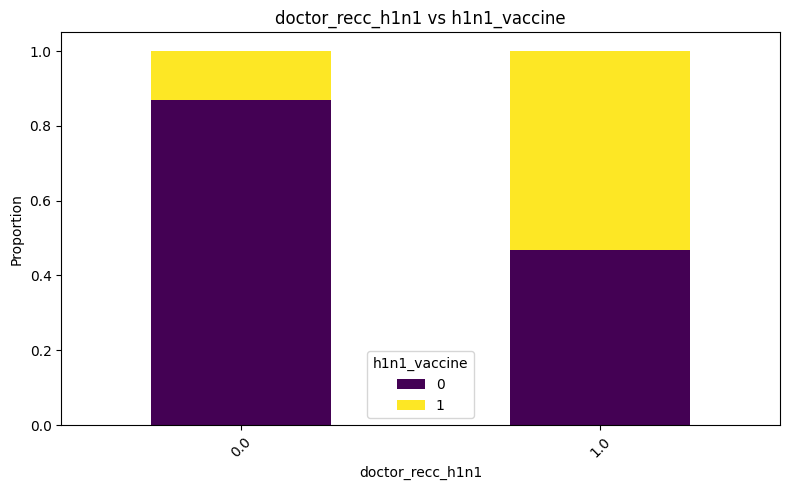

h1n1_vaccine             0         1
seasonal_vaccine                    
0                 0.931544  0.068456
1                 0.622276  0.377724


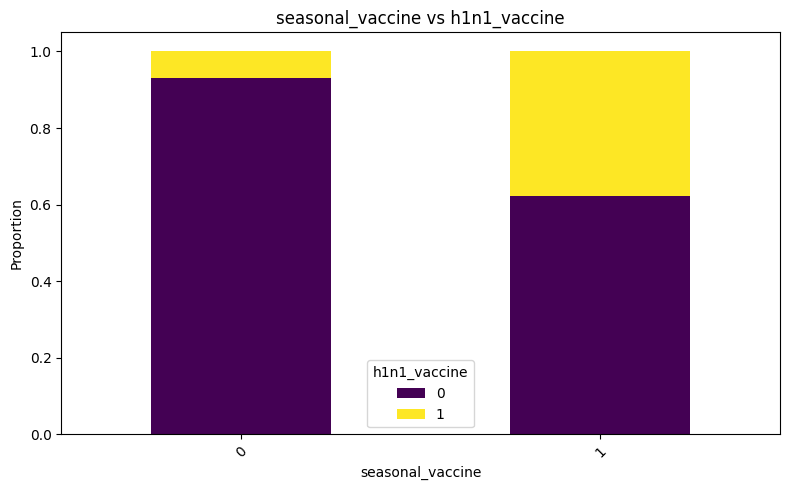

h1n1_vaccine              0         1
opinion_h1n1_risk                    
1.0                0.911660  0.088340
2.0                0.830018  0.169982
3.0                0.826321  0.173679
4.0                0.607898  0.392102
5.0                0.489143  0.510857


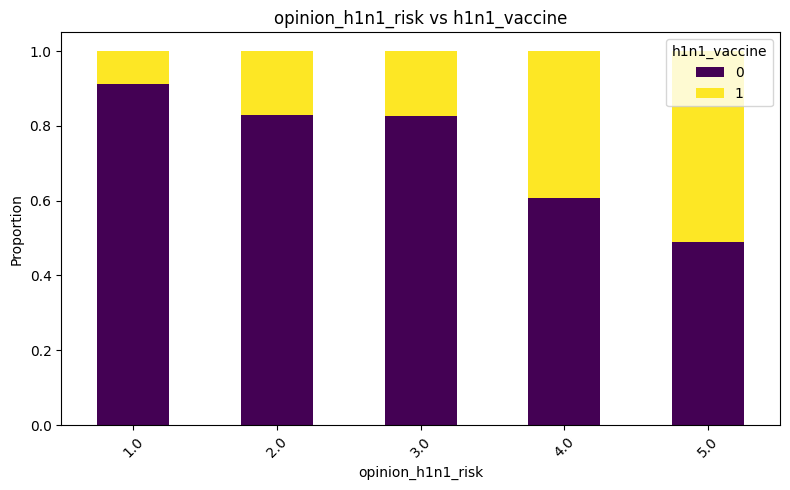

h1n1_vaccine                        0         1
opinion_h1n1_vacc_effective                    
1.0                          0.952596  0.047404
2.0                          0.948870  0.051130
3.0                          0.894347  0.105653
4.0                          0.823008  0.176992
5.0                          0.595172  0.404828


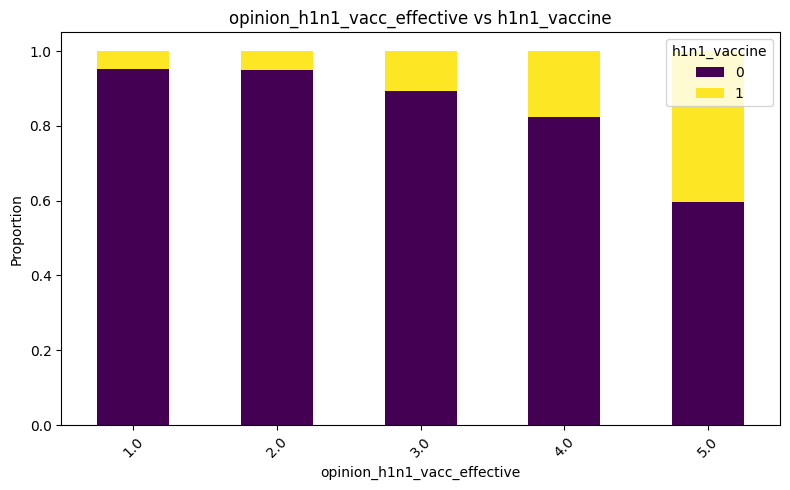

h1n1_vaccine              0         1
opinion_seas_risk                    
1.0                0.915300  0.084700
2.0                0.839987  0.160013
3.0                0.799114  0.200886
4.0                0.693971  0.306029
5.0                0.600406  0.399594


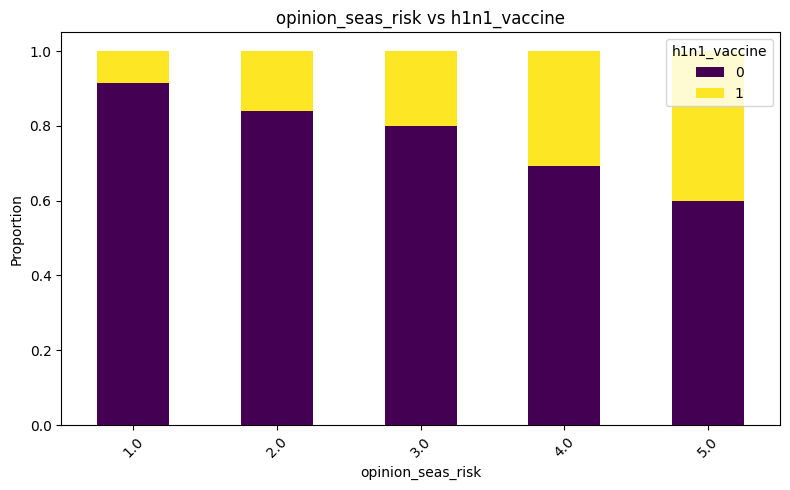

h1n1_vaccine                 0         1
doctor_recc_seasonal                    
0.0                   0.846613  0.153387
1.0                   0.651717  0.348283


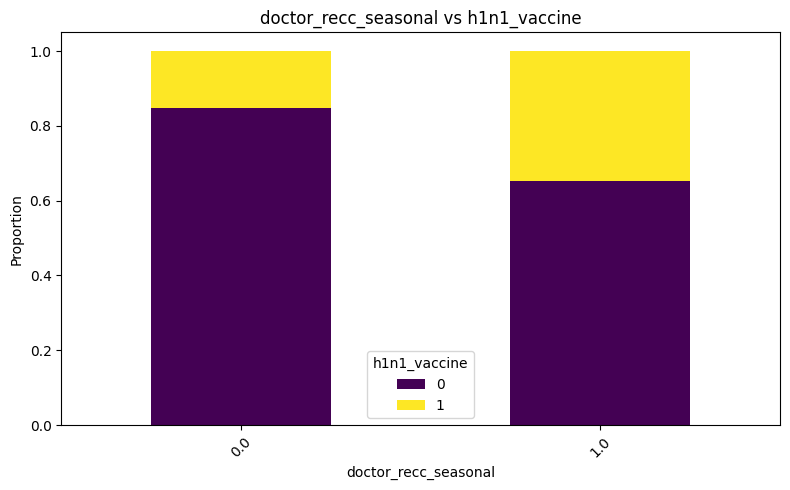

h1n1_vaccine                        0         1
opinion_seas_vacc_effective                    
1.0                          0.927109  0.072891
2.0                          0.907072  0.092928
3.0                          0.866776  0.133224
4.0                          0.822843  0.177157
5.0                          0.691567  0.308433


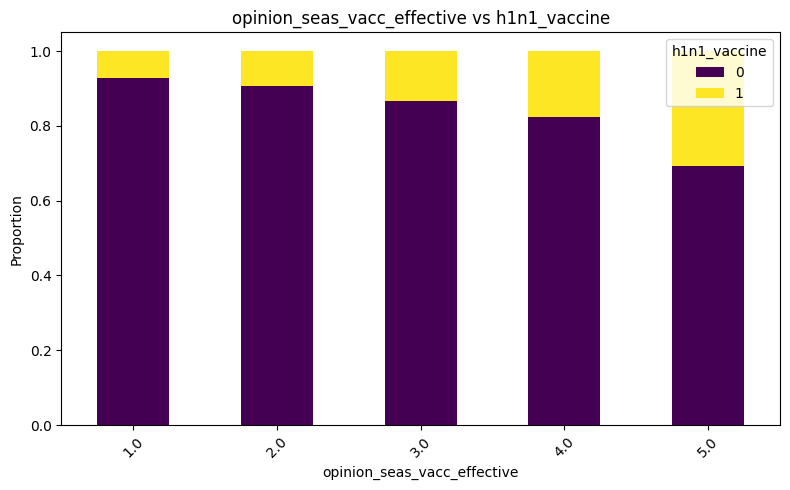

h1n1_vaccine          0         1
health_worker                    
0.0            0.811534  0.188466
1.0            0.590548  0.409452


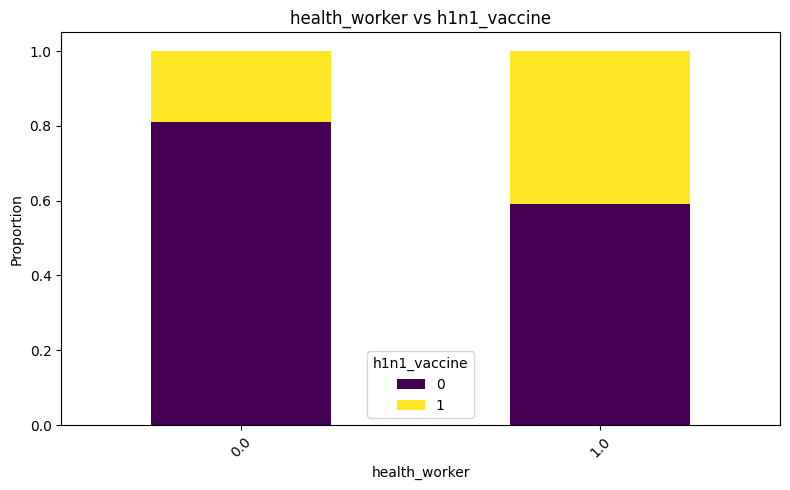

h1n1_vaccine         0         1
h1n1_concern                    
0.0           0.864381  0.135619
1.0           0.828652  0.171348
2.0           0.766664  0.233336
3.0           0.707907  0.292093


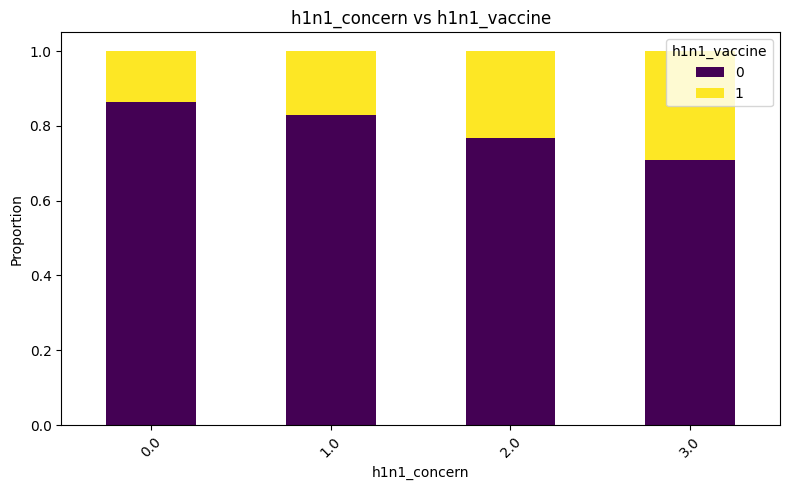

h1n1_vaccine           0         1
h1n1_knowledge                    
0.0             0.855946  0.144054
1.0             0.818200  0.181800
2.0             0.721935  0.278065


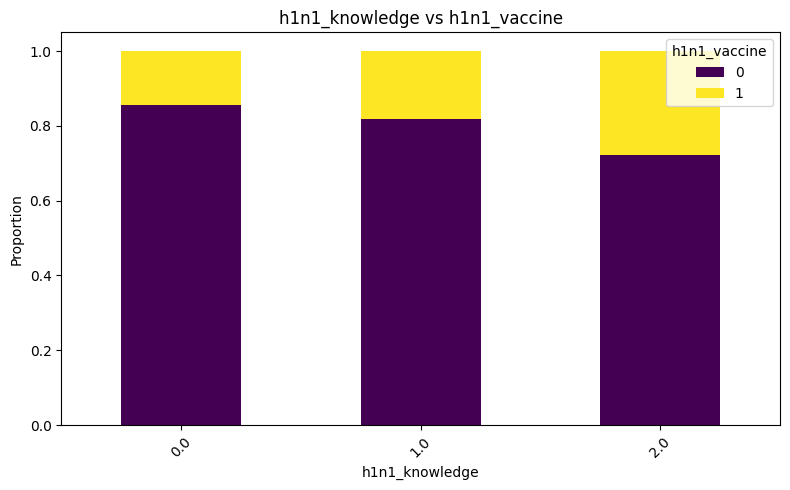

 Crosstab plots for target: `seasonal_vaccine`
seasonal_vaccine          0         1
opinion_seas_risk                    
1.0                0.790593  0.209407
2.0                0.625898  0.374102
3.0                0.443131  0.556869
4.0                0.336566  0.663434
5.0                0.255240  0.744760


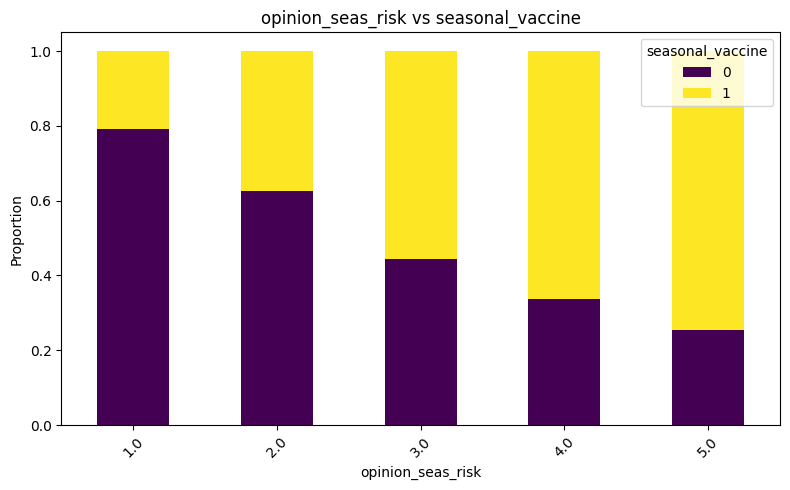

seasonal_vaccine         0         1
h1n1_vaccine                        
0                 0.632102  0.367898
1                 0.172189  0.827811


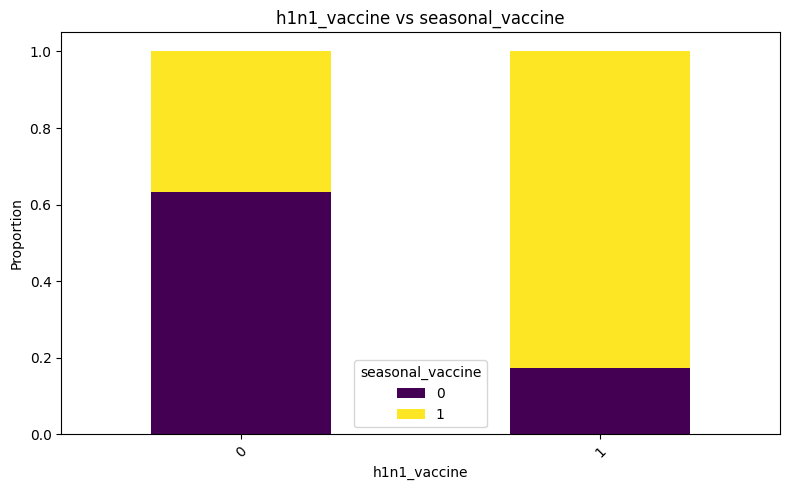

seasonal_vaccine             0         1
doctor_recc_seasonal                    
0.0                   0.653038  0.346962
1.0                   0.261552  0.738448


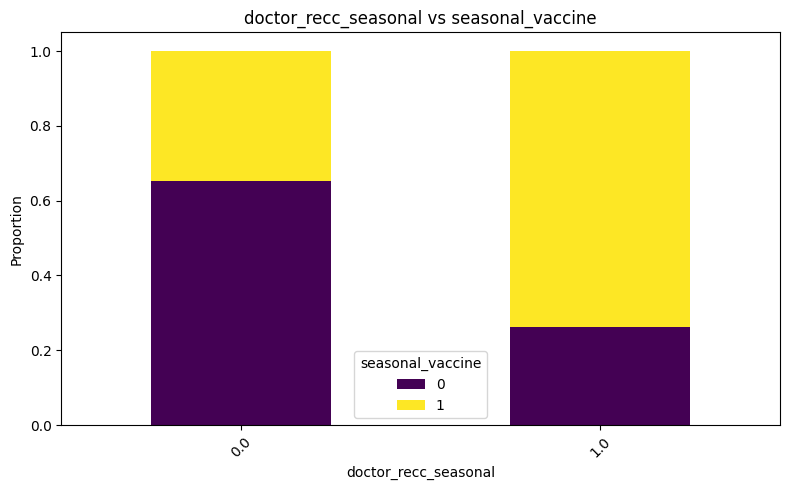

seasonal_vaccine                    0         1
opinion_seas_vacc_effective                    
1.0                          0.841933  0.158067
2.0                          0.854488  0.145512
3.0                          0.720395  0.279605
4.0                          0.623439  0.376561
5.0                          0.295297  0.704703


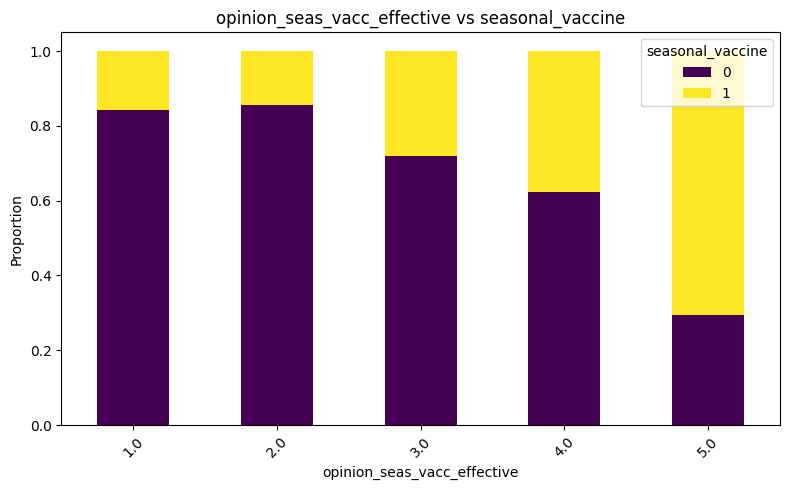

seasonal_vaccine         0         1
age_group                           
18 - 34 Years     0.715436  0.284564
35 - 44 Years     0.637474  0.362526
45 - 54 Years     0.598702  0.401298
55 - 64 Years     0.488765  0.511235
65+ Years         0.326319  0.673681


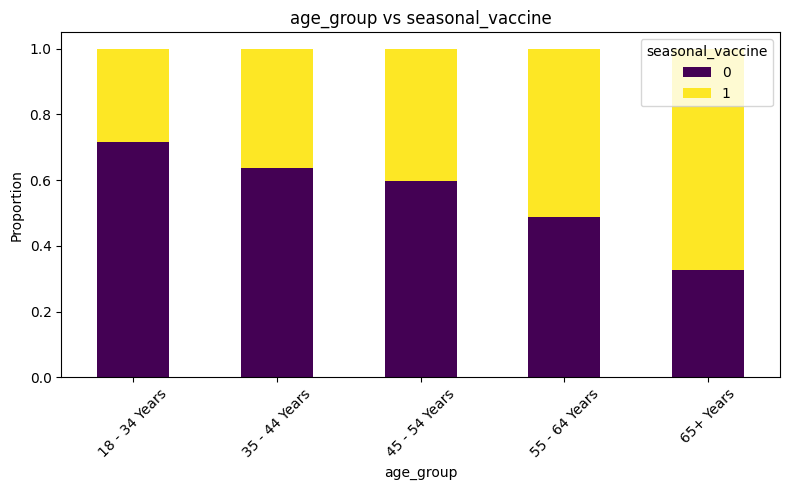

seasonal_vaccine          0         1
opinion_h1n1_risk                    
1.0                0.664332  0.335668
2.0                0.547492  0.452508
3.0                0.483438  0.516562
4.0                0.376159  0.623841
5.0                0.373143  0.626857


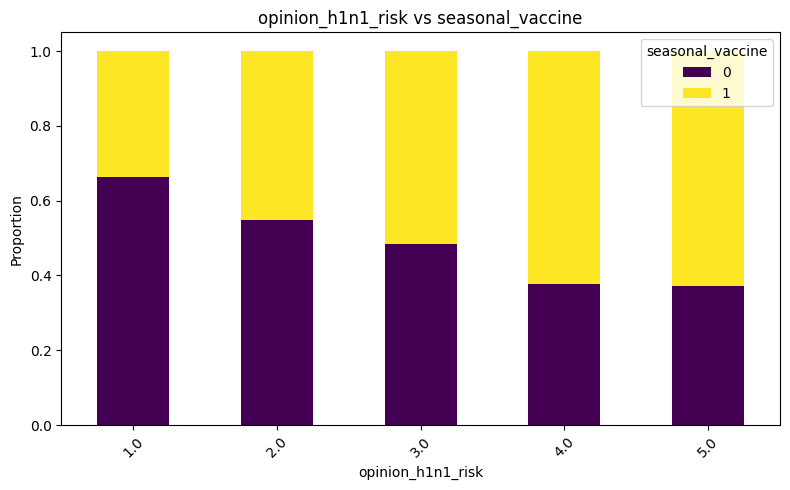

seasonal_vaccine                    0         1
opinion_h1n1_vacc_effective                    
1.0                          0.788939  0.211061
2.0                          0.743272  0.256728
3.0                          0.577387  0.422613
4.0                          0.553835  0.446165
5.0                          0.387664  0.612336


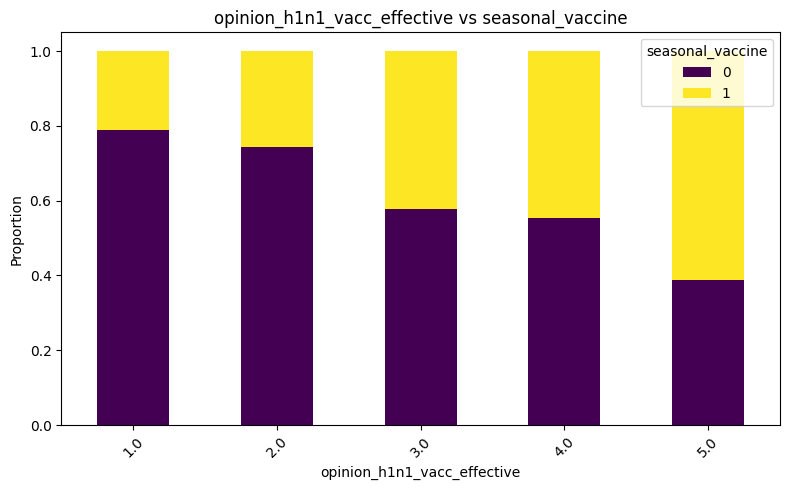

seasonal_vaccine         0         1
doctor_recc_h1n1                    
0.0               0.584300  0.415700
1.0               0.337833  0.662167


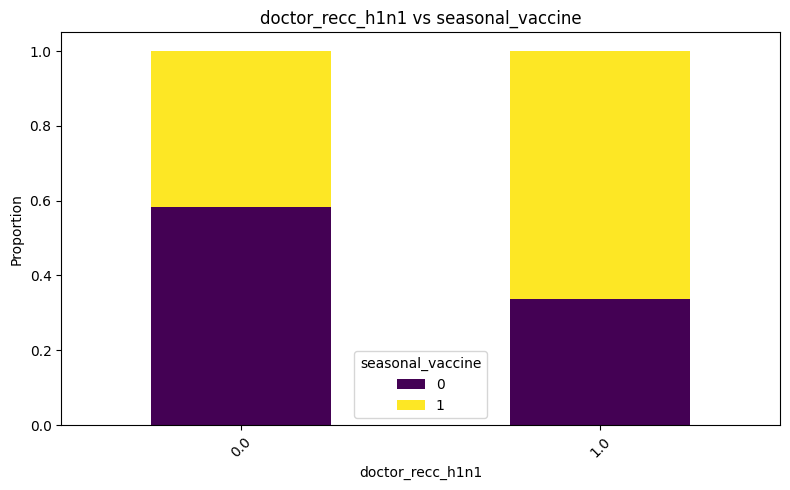

seasonal_vaccine              0         1
chronic_med_condition                    
0.0                    0.586187  0.413813
1.0                    0.396433  0.603567


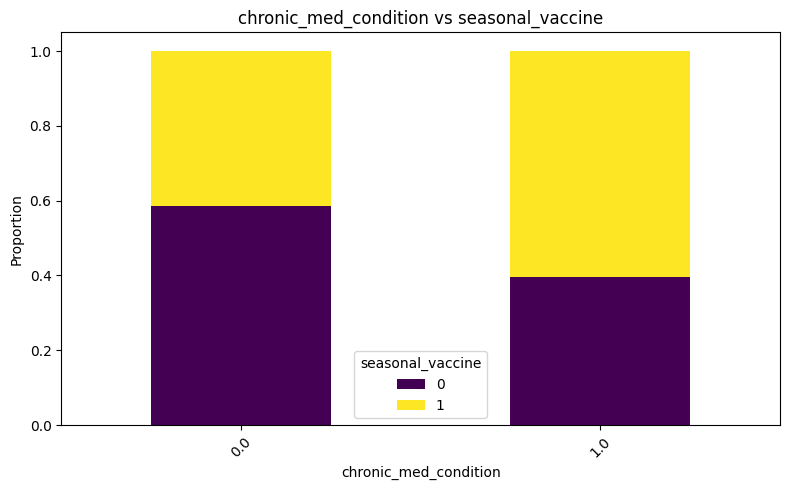

seasonal_vaccine         0         1
h1n1_concern                        
0.0               0.683859  0.316141
1.0               0.590090  0.409910
2.0               0.486079  0.513921
3.0               0.440427  0.559573


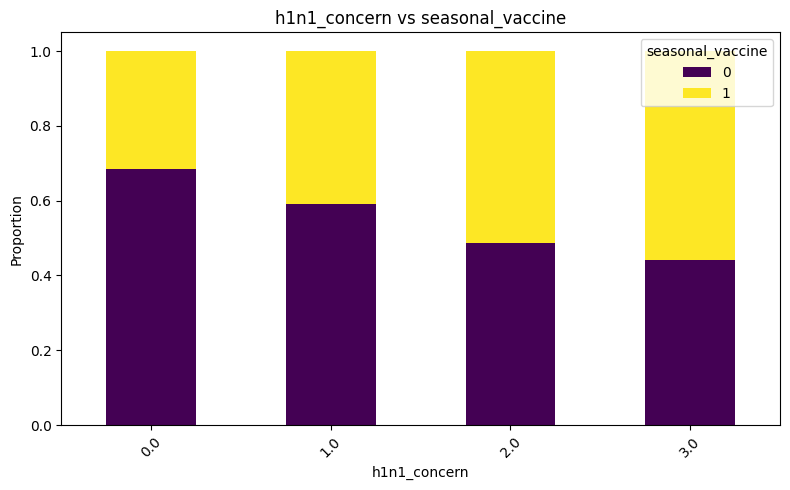

In [29]:
# Step 1: Create dictionary of top correlated features per target
top_corr_dict = {}

for target in ['h1n1_vaccine', 'seasonal_vaccine']:
    top_corr = df_encoded.corr()[target] \
        .drop(labels=[target]) \
        .abs() \
        .sort_values(ascending=False) \
        .head(10) \
        .index.tolist()
    
    top_corr_dict[target] = top_corr

# Step 2: Loop through and plot using
for target, feature_list in top_corr_dict.items():
    print(f" Crosstab plots for target: `{target}`")
    for feature in feature_list:
        eda.crosstab_plot(feature, target)


seasonal_vaccine         0         1
age_group                           
18 - 34 Years     0.715436  0.284564
35 - 44 Years     0.637474  0.362526
45 - 54 Years     0.598702  0.401298
55 - 64 Years     0.488765  0.511235
65+ Years         0.326319  0.673681


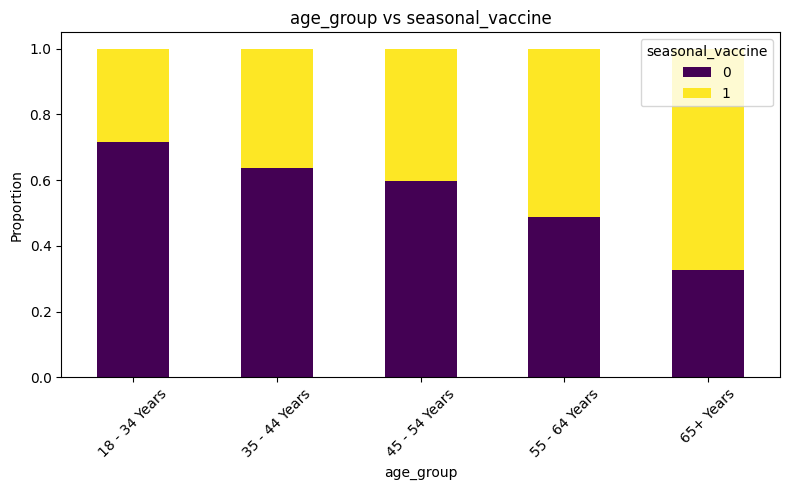

In [30]:
eda.crosstab_plot('age_group', 'seasonal_vaccine')

---
## Step 4: Modeling – Predicting Vaccine Uptake

With the data cleaned, encoded, and explored, we now move into the **modeling phase**.

In this section, we aim to:
- Define our features (`X`) and target (`y`)
- Split the dataset into training and test sets
- Train baseline classification models (e.g., Logistic Regression, Decision Tree)
- Evaluate model performance using metrics such as **accuracy, precision, recall, and F1-score**
- Use confusion matrices and classification reports for deeper insight

We will begin with simple baseline models and progressively improve using:
- Hyperparameter tuning
- Cross-validation
- Feature engineering

Our goal: Build an effective model to predict whether a person received the **H1N1 vaccine** or the **Seasonal flu vaccine**, based on their characteristics, behaviors, and opinions.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# imports from VaccineModel class
from modelling import VaccineModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, confusion_matrix, classification_report
# )

### Baseline Modeling: Logistic Regression vs. Decision Tree

To establish a benchmark, we start training two baseline models on the encoded dataset:
- **Logistic Regression**: A linear model suitable for binary classification
- **Decision Tree**: A non-linear, rule-based model that can capture interactions

He we use baseline parameters for both and evaluate performance using accuracy, precision, recall, and F1-score. This helps us compare model complexity vs. predictive performance in future iterations.


#### Baseline Modelling for H1N1

In [68]:
# Logistic regression is set as default in VaccineModel class

h1n1_lr_base = VaccineModel(df_encoded, target='h1n1_vaccine', scale=True)
h1n1_lr_base.split_data()
h1n1_lr_base.train_model()
h1n1_lr_base.evaluate()


 Evaluation for `h1n1_vaccine` using Pipeline:

Accuracy: 0.8356420816173717
Precision: 0.6848920863309352
Recall: 0.4193832599118943
F1 Score: 0.5202185792349727

Confusion Matrix:
[[3988  219]
 [ 659  476]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
           1       0.68      0.42      0.52      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.84      0.82      5342



In [63]:
# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

h1n1_tree_base = VaccineModel(df_encoded, target='h1n1_vaccine', model=tree_model)
h1n1_tree_base.split_data()
h1n1_tree_base.train_model()
h1n1_tree_base.evaluate()


 Evaluation for `h1n1_vaccine` using DecisionTreeClassifier:

Accuracy: 0.8264694870834893
Precision: 0.6268292682926829
Recall: 0.452863436123348
F1 Score: 0.5258312020460358

Confusion Matrix:
[[3901  306]
 [ 621  514]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4207
           1       0.63      0.45      0.53      1135

    accuracy                           0.83      5342
   macro avg       0.74      0.69      0.71      5342
weighted avg       0.81      0.83      0.82      5342



#### Confusion Matrix comparison

In [72]:
def plot_confusion_matrices(y_true_lr, y_pred_lr, y_true_tree, y_pred_tree, labels=[0, 1]):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Logistic Regression
    cm_lr = confusion_matrix(y_true_lr, y_pred_lr, labels=labels)
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title("Logistic Regression")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # Decision Tree
    cm_tree = confusion_matrix(y_true_tree, y_pred_tree, labels=labels)
    sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1])
    axes[1].set_title("Decision Tree")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()


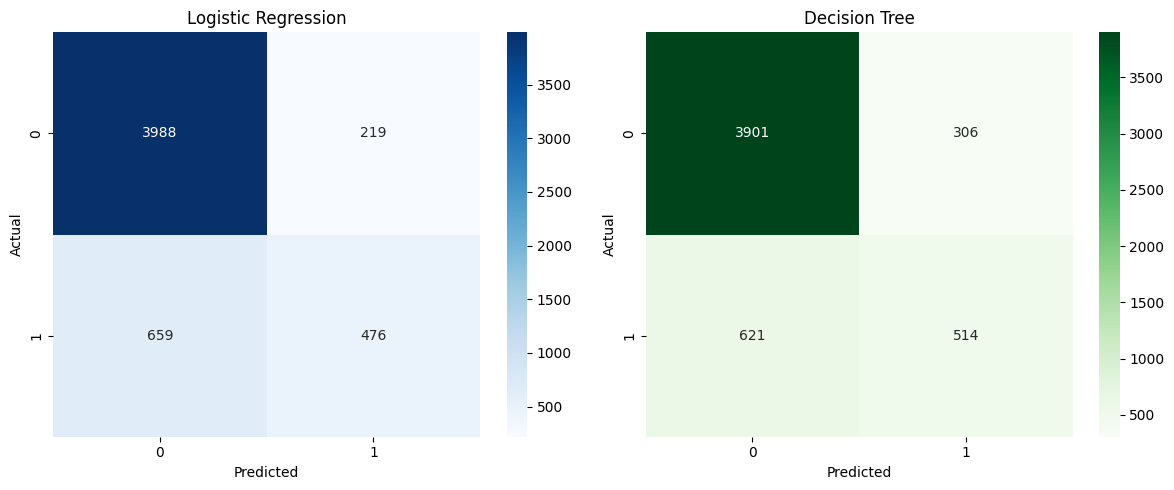

In [74]:
# plot confusion matrix for H1N1 vaccine compaing logReg and decisiontree
plot_confusion_matrices(
    y_true_lr=h1n1_lr_base.y_test,
    y_pred_lr=h1n1_lr_base.y_pred,
    y_true_tree=h1n1_tree_base.y_test,
    y_pred_tree=h1n1_tree_base.y_pred
)

#### Baseline Modelling for Seasonal Vaccine

In [76]:
# Logistic regression is set as default in VaccineModel class

seasonal_lr_base = VaccineModel(df_encoded, target='seasonal_vaccine', scale=True)
seasonal_lr_base.split_data()
seasonal_lr_base.train_model()
seasonal_lr_base.evaluate()


 Evaluation for `seasonal_vaccine` using Pipeline:

Accuracy: 0.7789217521527517
Precision: 0.7831743278404163
Recall: 0.7261761158021713
F1 Score: 0.7535989985395368

Confusion Matrix:
[[2355  500]
 [ 681 1806]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2855
           1       0.78      0.73      0.75      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [78]:
# Decision Tree
tree_model1 = DecisionTreeClassifier(max_depth=5, random_state=42)

seasonal_tree_base = VaccineModel(df_encoded, target='seasonal_vaccine', model=tree_model1)
seasonal_tree_base.split_data()
seasonal_tree_base.train_model()
seasonal_tree_base.evaluate()


 Evaluation for `seasonal_vaccine` using DecisionTreeClassifier:

Accuracy: 0.7523399475851741
Precision: 0.7886904761904762
Recall: 0.6393244873341375
F1 Score: 0.7061958694203864

Confusion Matrix:
[[2429  426]
 [ 897 1590]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      2855
           1       0.79      0.64      0.71      2487

    accuracy                           0.75      5342
   macro avg       0.76      0.75      0.75      5342
weighted avg       0.76      0.75      0.75      5342



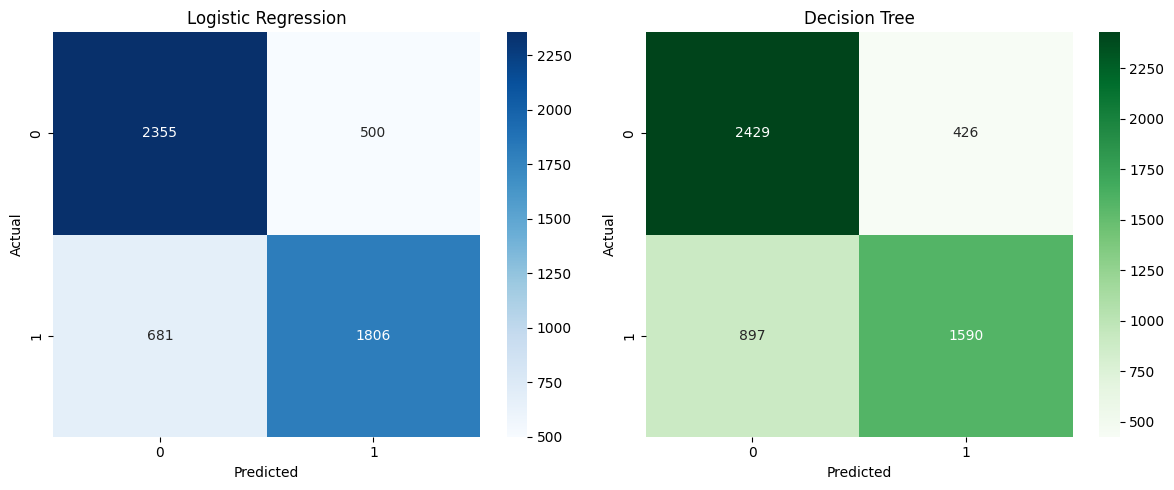

In [80]:
# plot confusion matrix for seasnal vaccine compaing logReg and decisiontree

plot_confusion_matrices(
    y_true_lr=seasonal_lr_base.y_test,
    y_pred_lr=seasonal_lr_base.y_pred,
    y_true_tree=seasonal_tree_base.y_test,
    y_pred_tree=seasonal_tree_base.y_pred
)